In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from corner import corner
from tqdm.notebook import tqdm
from scipy.stats import gaussian_kde
import sys
sys.path.append('./../code/')
from support import *
from makeCorner import *
import h5py,json

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# 1. Gaussian spin results, FAR<1/1yr, without GW190814

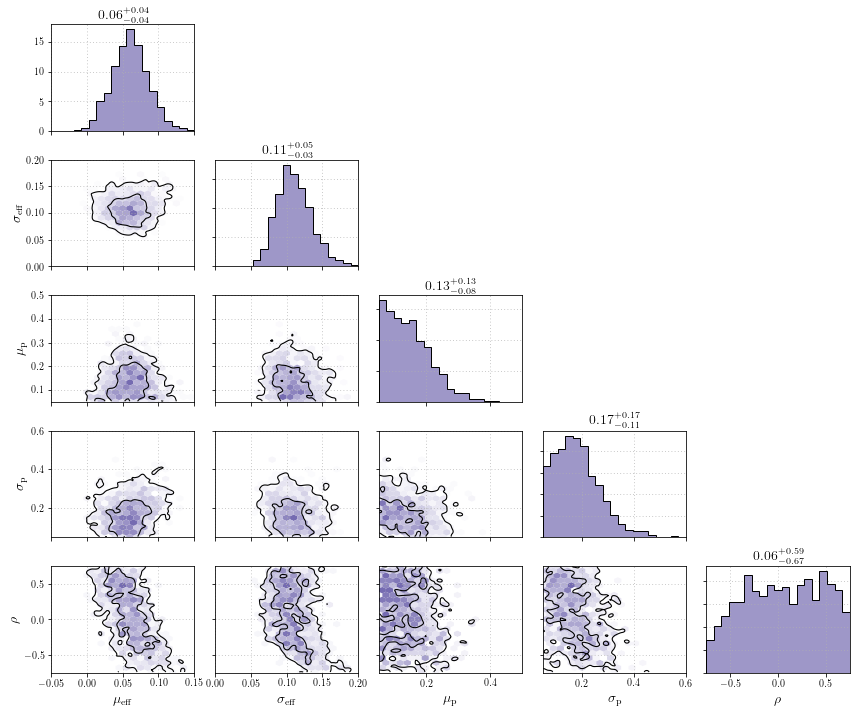

In [2]:
processed_samps = np.load('./../results/results_11-29/processed_gaussian_spin_samples_FAR_1_in_1_r00.npy','r')

to_plot = {
    'muEff':{'data':processed_samps[:,-5],'plot_bounds':(-0.05,0.15),'label':r"$\mu_\mathrm{eff}$"},
    'sigEff':{'data':processed_samps[:,-4],'plot_bounds':(0,0.2),'label':r"$\sigma_\mathrm{eff}$"},
    'muP':{'data':processed_samps[:,-3],'plot_bounds':(0.05,0.5),'label':r"$\mu_\mathrm{p}$"},
    'sigP':{'data':processed_samps[:,-2],'plot_bounds':(0.05,0.6),'label':r"$\sigma_\mathrm{p}$"},
    'rho':{'data':processed_samps[:,-1],'plot_bounds':(-0.75,0.75),'label':r"$\rho$"}
    }

fig = plt.figure(figsize=(12,10))
plot_corner(fig,to_plot,"#756bb1")
plt.show()

In [3]:
gwpop_file = "/home/thomas.callister/CBC/o3b-population-data/analyses/PowerLawPeak/o1o2o3_mass_c_iid_mag_iid_tilt_powerlaw_redshift_result.json"
with open(gwpop_file,'r') as jf:
    gwpop_results = json.load(jf)
    
defaultFile = "/home/thomas.callister/CBC/o3b-pop-studies/post-processing/post_processed_current/default-spin-xeff-xp-ppd-data.json"
with open(defaultFile,'r') as jf:
    defaultData = json.load(jf)

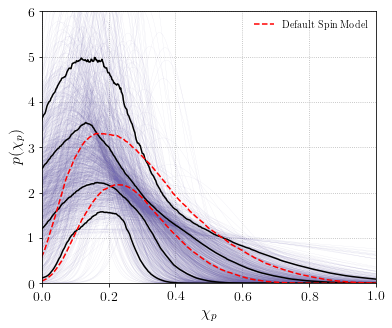

In [4]:
mu = processed_samps[:,-3]
sig = processed_samps[:,-2]

fig,ax = plt.subplots(figsize=(6,5))
x_grid = np.linspace(0,1,500)

ys = np.zeros((mu.size,x_grid.size))

for i in range(mu.size):

    y = calculate_Gaussian(x_grid,mu[i],sig[i]**2.,0,1)
    ax.plot(x_grid,y,color='#756bb1',alpha=0.2,lw=0.2)
    ys[i,:] = y
    
ax.plot(x_grid,np.quantile(ys,0.05,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.25,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.75,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.95,axis=0),color='black')

ax.plot(defaultData['chi_p_grid'],np.quantile(defaultData['chi_p_pdfs'],0.05,axis=1),color='red',ls='--',
       label='Default Spin Model')
ax.plot(defaultData['chi_p_grid'],np.quantile(defaultData['chi_p_pdfs'],0.95,axis=1),color='red',ls='--')
    
ax.legend(loc='upper right',frameon=False)
ax.set_xlim(0,1)
ax.set_ylim(0,6)
ax.axes.grid(True,which='major',ls=':')
ax.set_xlabel('$\chi_p$',fontsize=16)
ax.set_ylabel('$p(\chi_p)$',fontsize=16)
ax.tick_params(labelsize=14)

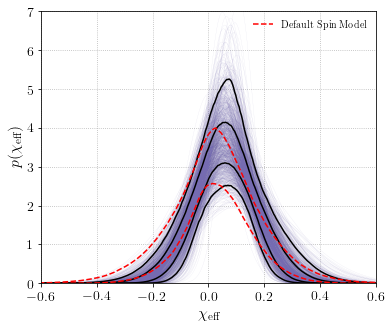

In [5]:
mu = processed_samps[:,-5]
sig = processed_samps[:,-4]

fig,ax = plt.subplots(figsize=(6,5))
x_grid = np.linspace(-1,1,500)

ys = np.zeros((mu.size,x_grid.size))

for i in range(mu.size):

    y = calculate_Gaussian(x_grid,mu[i],sig[i]**2.,-1,1)
    ax.plot(x_grid,y,color='#756bb1',alpha=0.2,lw=0.2)
    ys[i,:] = y
    
ax.plot(x_grid,np.quantile(ys,0.05,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.25,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.75,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.95,axis=0),color='black')

ax.plot(defaultData['chi_eff_grid'],np.quantile(defaultData['chi_eff_pdfs'],0.05,axis=1),color='red',ls='--',
       label='Default Spin Model')
ax.plot(defaultData['chi_eff_grid'],np.quantile(defaultData['chi_eff_pdfs'],0.95,axis=1),color='red',ls='--')
    
ax.legend(loc='upper right',frameon=False)
ax.set_xlim(-0.6,0.6)
ax.set_ylim(0,7)
ax.axes.grid(True,which='major',ls=':')
ax.set_xlabel('$\chi_\mathrm{eff}$',fontsize=16)
ax.set_ylabel('$p(\chi_\mathrm{eff})$',fontsize=16)
ax.tick_params(labelsize=14)

# 1.b Same, half the samples per event

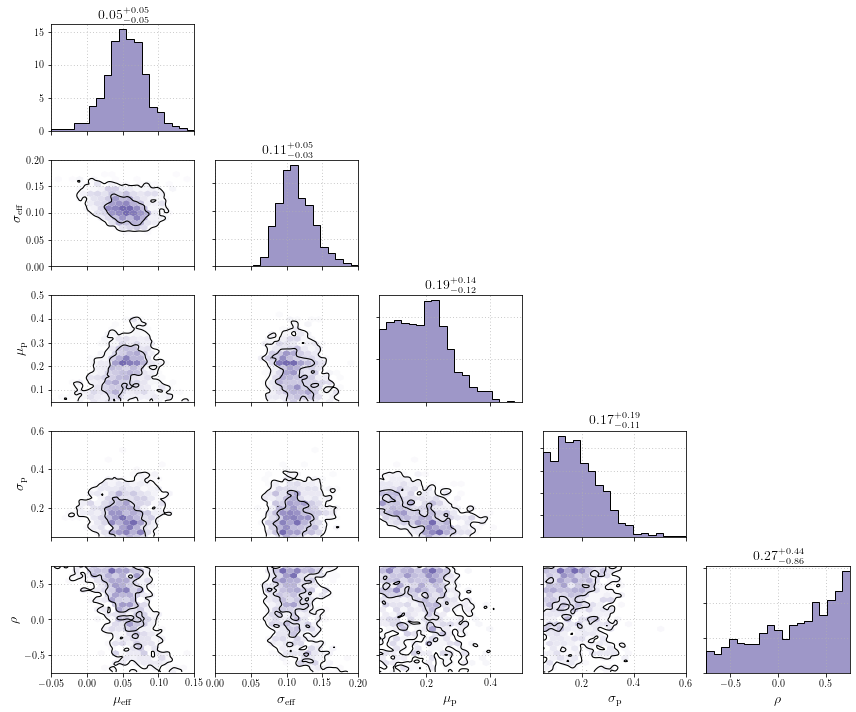

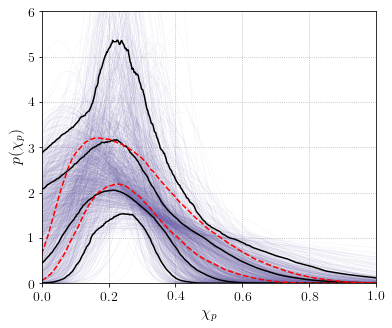

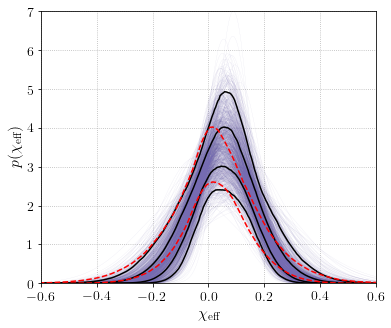

In [6]:
processed_samps = np.load('./../results/results_10-19/processed_gaussian_spin_samples_FAR_1_in_1_halfSamps_r00.npy','r')

to_plot = {
    'muEff':{'data':processed_samps[:,-5],'plot_bounds':(-0.05,0.15),'label':r"$\mu_\mathrm{eff}$"},
    'sigEff':{'data':processed_samps[:,-4],'plot_bounds':(0,0.2),'label':r"$\sigma_\mathrm{eff}$"},
    'muP':{'data':processed_samps[:,-3],'plot_bounds':(0.05,0.5),'label':r"$\mu_\mathrm{p}$"},
    'sigP':{'data':processed_samps[:,-2],'plot_bounds':(0.05,0.6),'label':r"$\sigma_\mathrm{p}$"},
    'rho':{'data':processed_samps[:,-1],'plot_bounds':(-0.75,0.75),'label':r"$\rho$"}
    }

fig = plt.figure(figsize=(12,10))
plot_corner(fig,to_plot,"#756bb1")
plt.show()

# Marginal chi_p
mu = processed_samps[:,-3]
sig = processed_samps[:,-2]

fig,ax = plt.subplots(figsize=(6,5))
x_grid = np.linspace(0,1,500)
ys = np.zeros((mu.size,x_grid.size))

for i in range(mu.size):

    y = calculate_Gaussian(x_grid,mu[i],sig[i]**2.,0,1)
    ax.plot(x_grid,y,color='#756bb1',alpha=0.2,lw=0.2)
    ys[i,:] = y
    
ax.plot(x_grid,np.quantile(ys,0.05,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.25,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.75,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.95,axis=0),color='black')

ax.plot(defaultData['chi_p_grid'],np.quantile(defaultData['chi_p_pdfs'],0.05,axis=1),color='red',ls='--')
ax.plot(defaultData['chi_p_grid'],np.quantile(defaultData['chi_p_pdfs'],0.95,axis=1),color='red',ls='--')
    
ax.set_xlim(0,1)
ax.set_ylim(0,6)
ax.axes.grid(True,which='major',ls=':')
ax.set_xlabel('$\chi_p$',fontsize=16)
ax.set_ylabel('$p(\chi_p)$',fontsize=16)
ax.tick_params(labelsize=14)
plt.show()

# Marginal chi_eff
mu = processed_samps[:,-5]
sig = processed_samps[:,-4]

fig,ax = plt.subplots(figsize=(6,5))
x_grid = np.linspace(-1,1,500)

ys = np.zeros((mu.size,x_grid.size))

for i in range(mu.size):

    y = calculate_Gaussian(x_grid,mu[i],sig[i]**2.,-1,1)
    ax.plot(x_grid,y,color='#756bb1',alpha=0.2,lw=0.2)
    ys[i,:] = y
    
ax.plot(x_grid,np.quantile(ys,0.05,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.25,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.75,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.95,axis=0),color='black')

ax.plot(defaultData['chi_eff_grid'],np.quantile(defaultData['chi_eff_pdfs'],0.05,axis=1),color='red',ls='--')
ax.plot(defaultData['chi_eff_grid'],np.quantile(defaultData['chi_eff_pdfs'],0.95,axis=1),color='red',ls='--')
    
ax.set_xlim(-0.6,0.6)
ax.set_ylim(0,7)
ax.axes.grid(True,which='major',ls=':')
ax.set_xlabel('$\chi_\mathrm{eff}$',fontsize=16)
ax.set_ylabel('$p(\chi_\mathrm{eff})$',fontsize=16)
ax.tick_params(labelsize=14)

# 2. Gaussian spin results, FAR<1/5yr, without GW190814

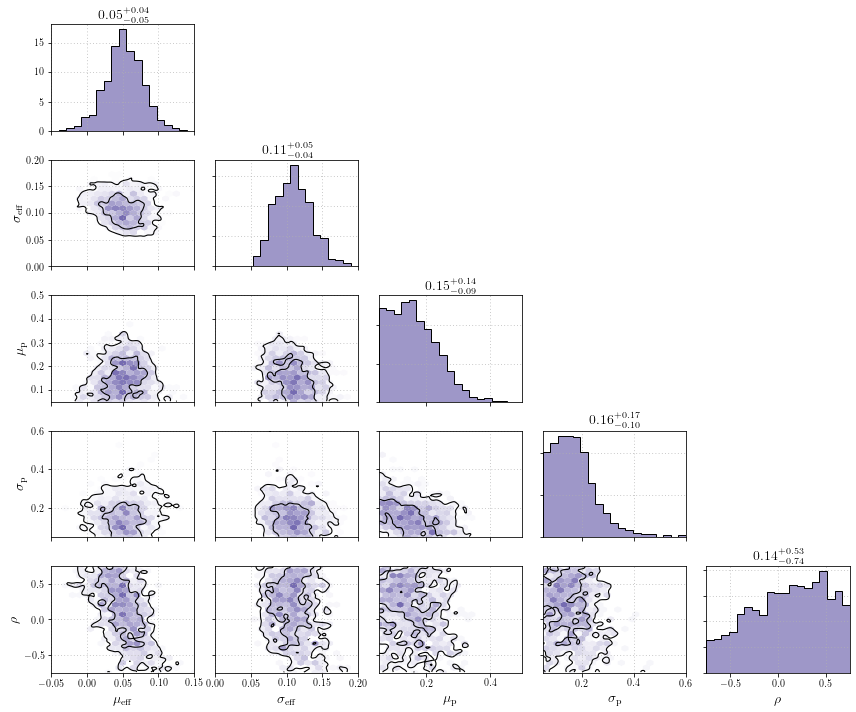

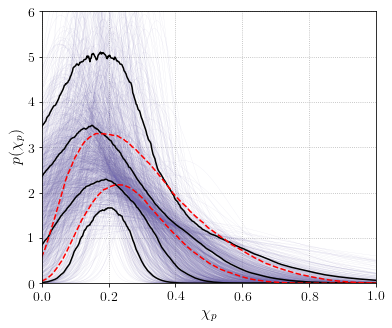

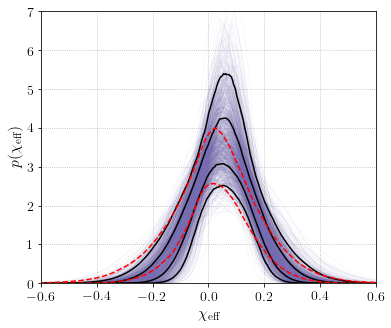

In [6]:
processed_samps = np.load('./../results/results_11-29/processed_gaussian_spin_samples_FAR_1_in_5_r00.npy','r')

to_plot = {
    'muEff':{'data':processed_samps[:,-5],'plot_bounds':(-0.05,0.15),'label':r"$\mu_\mathrm{eff}$"},
    'sigEff':{'data':processed_samps[:,-4],'plot_bounds':(0,0.2),'label':r"$\sigma_\mathrm{eff}$"},
    'muP':{'data':processed_samps[:,-3],'plot_bounds':(0.05,0.5),'label':r"$\mu_\mathrm{p}$"},
    'sigP':{'data':processed_samps[:,-2],'plot_bounds':(0.05,0.6),'label':r"$\sigma_\mathrm{p}$"},
    'rho':{'data':processed_samps[:,-1],'plot_bounds':(-0.75,0.75),'label':r"$\rho$"}
    }

fig = plt.figure(figsize=(12,10))
plot_corner(fig,to_plot,"#756bb1")
plt.show()

# Marginal chi_p
mu = processed_samps[:,-3]
sig = processed_samps[:,-2]

fig,ax = plt.subplots(figsize=(6,5))
x_grid = np.linspace(0,1,500)
ys = np.zeros((mu.size,x_grid.size))

for i in range(mu.size):

    y = calculate_Gaussian(x_grid,mu[i],sig[i]**2.,0,1)
    ax.plot(x_grid,y,color='#756bb1',alpha=0.2,lw=0.2)
    ys[i,:] = y
    
ax.plot(x_grid,np.quantile(ys,0.05,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.25,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.75,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.95,axis=0),color='black')

ax.plot(defaultData['chi_p_grid'],np.quantile(defaultData['chi_p_pdfs'],0.05,axis=1),color='red',ls='--')
ax.plot(defaultData['chi_p_grid'],np.quantile(defaultData['chi_p_pdfs'],0.95,axis=1),color='red',ls='--')
    
ax.set_xlim(0,1)
ax.set_ylim(0,6)
ax.axes.grid(True,which='major',ls=':')
ax.set_xlabel('$\chi_p$',fontsize=16)
ax.set_ylabel('$p(\chi_p)$',fontsize=16)
ax.tick_params(labelsize=14)
plt.show()

# Marginal chi_eff
mu = processed_samps[:,-5]
sig = processed_samps[:,-4]

fig,ax = plt.subplots(figsize=(6,5))
x_grid = np.linspace(-1,1,500)

ys = np.zeros((mu.size,x_grid.size))

for i in range(mu.size):

    y = calculate_Gaussian(x_grid,mu[i],sig[i]**2.,-1,1)
    ax.plot(x_grid,y,color='#756bb1',alpha=0.2,lw=0.2)
    ys[i,:] = y
    
ax.plot(x_grid,np.quantile(ys,0.05,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.25,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.75,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.95,axis=0),color='black')

ax.plot(defaultData['chi_eff_grid'],np.quantile(defaultData['chi_eff_pdfs'],0.05,axis=1),color='red',ls='--')
ax.plot(defaultData['chi_eff_grid'],np.quantile(defaultData['chi_eff_pdfs'],0.95,axis=1),color='red',ls='--')
    
ax.set_xlim(-0.6,0.6)
ax.set_ylim(0,7)
ax.axes.grid(True,which='major',ls=':')
ax.set_xlabel('$\chi_\mathrm{eff}$',fontsize=16)
ax.set_ylabel('$p(\chi_\mathrm{eff})$',fontsize=16)
ax.tick_params(labelsize=14)

# 3. Gaussian spin results, FAR<1/1yr, with GW190814

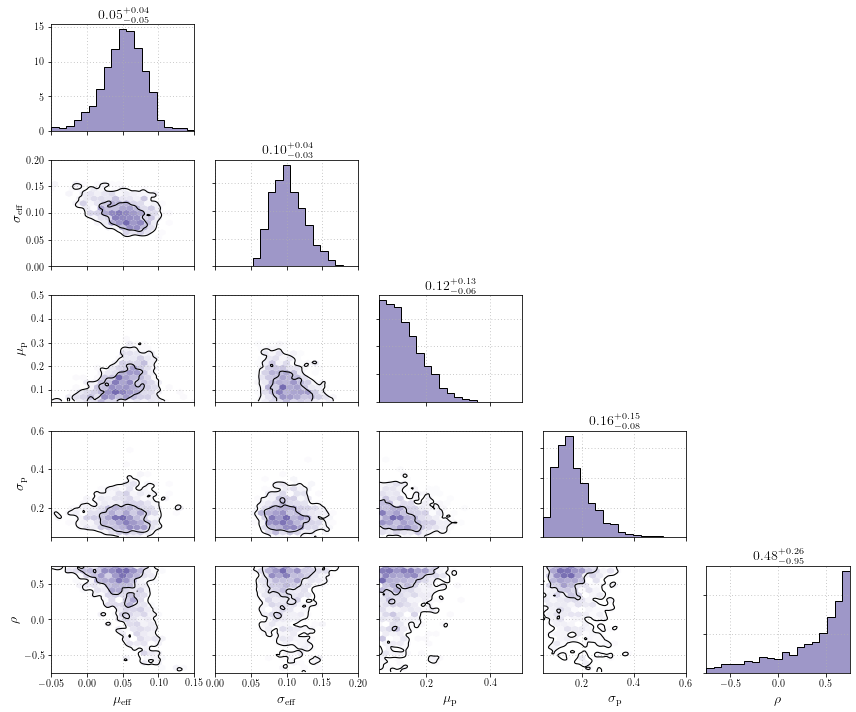

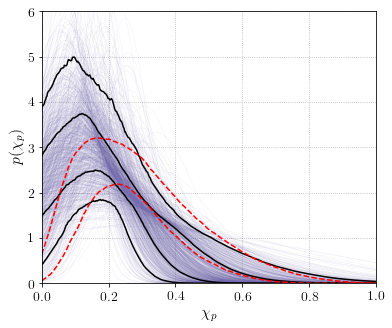

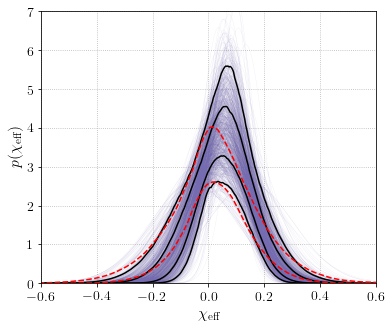

In [8]:
processed_samps = np.load('./../results/results_10-19/processed_gaussian_spin_samples_FAR_1_in_1_w190814_r00.npy','r')

to_plot = {
    'muEff':{'data':processed_samps[:,-5],'plot_bounds':(-0.05,0.15),'label':r"$\mu_\mathrm{eff}$"},
    'sigEff':{'data':processed_samps[:,-4],'plot_bounds':(0,0.2),'label':r"$\sigma_\mathrm{eff}$"},
    'muP':{'data':processed_samps[:,-3],'plot_bounds':(0.05,0.5),'label':r"$\mu_\mathrm{p}$"},
    'sigP':{'data':processed_samps[:,-2],'plot_bounds':(0.05,0.6),'label':r"$\sigma_\mathrm{p}$"},
    'rho':{'data':processed_samps[:,-1],'plot_bounds':(-0.75,0.75),'label':r"$\rho$"}
    }

fig = plt.figure(figsize=(12,10))
plot_corner(fig,to_plot,"#756bb1")
plt.show()

# Marginal chi_p
mu = processed_samps[:,-3]
sig = processed_samps[:,-2]

fig,ax = plt.subplots(figsize=(6,5))
x_grid = np.linspace(0,1,500)
ys = np.zeros((mu.size,x_grid.size))

for i in range(mu.size):

    y = calculate_Gaussian(x_grid,mu[i],sig[i]**2.,0,1)
    ax.plot(x_grid,y,color='#756bb1',alpha=0.2,lw=0.2)
    ys[i,:] = y
    
ax.plot(x_grid,np.quantile(ys,0.05,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.25,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.75,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.95,axis=0),color='black')

ax.plot(defaultData['chi_p_grid'],np.quantile(defaultData['chi_p_pdfs'],0.05,axis=1),color='red',ls='--')
ax.plot(defaultData['chi_p_grid'],np.quantile(defaultData['chi_p_pdfs'],0.95,axis=1),color='red',ls='--')
    
ax.set_xlim(0,1)
ax.set_ylim(0,6)
ax.axes.grid(True,which='major',ls=':')
ax.set_xlabel('$\chi_p$',fontsize=16)
ax.set_ylabel('$p(\chi_p)$',fontsize=16)
ax.tick_params(labelsize=14)
plt.show()

# Marginal chi_eff
mu = processed_samps[:,-5]
sig = processed_samps[:,-4]

fig,ax = plt.subplots(figsize=(6,5))
x_grid = np.linspace(-1,1,500)

ys = np.zeros((mu.size,x_grid.size))

for i in range(mu.size):

    y = calculate_Gaussian(x_grid,mu[i],sig[i]**2.,-1,1)
    if np.abs(np.trapz(y,x_grid)-1)>0.05:
        print("!!!!")
        break
    ax.plot(x_grid,y,color='#756bb1',alpha=0.2,lw=0.2)
    ys[i,:] = y
    
ax.plot(x_grid,np.quantile(ys,0.05,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.25,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.75,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.95,axis=0),color='black')

ax.plot(defaultData['chi_eff_grid'],np.quantile(defaultData['chi_eff_pdfs'],0.05,axis=1),color='red',ls='--')
ax.plot(defaultData['chi_eff_grid'],np.quantile(defaultData['chi_eff_pdfs'],0.95,axis=1),color='red',ls='--')
    
ax.set_xlim(-0.6,0.6)
ax.set_ylim(0,7)
ax.axes.grid(True,which='major',ls=':')
ax.set_xlabel('$\chi_\mathrm{eff}$',fontsize=16)
ax.set_ylabel('$p(\chi_\mathrm{eff})$',fontsize=16)
ax.tick_params(labelsize=14)

# 4. Compare mass parameters with results from gwpopulation

Note that some differences are seen, particularly in the `alpha` and `mMax` posteriors

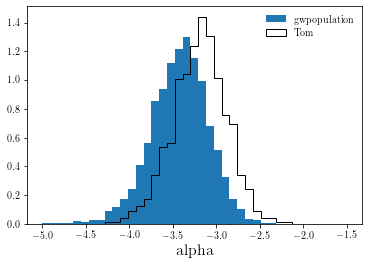

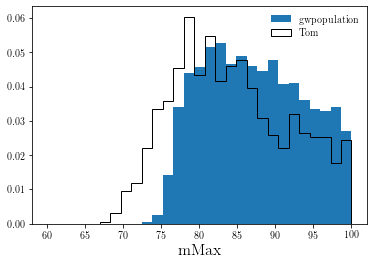

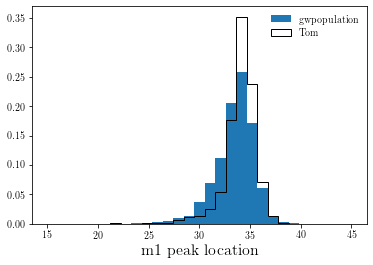

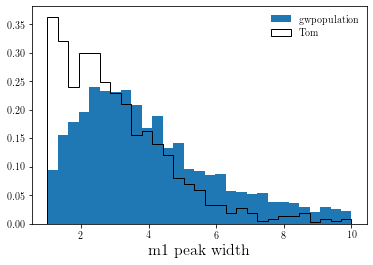

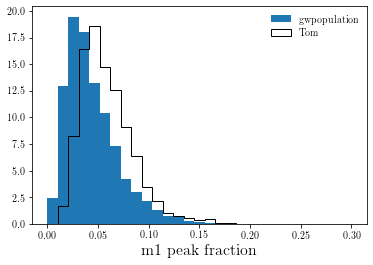

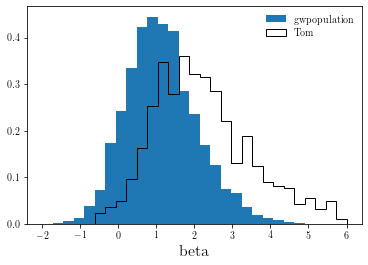

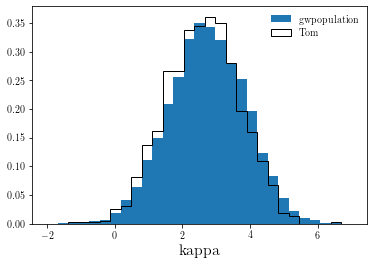

In [7]:
processed_samps = np.load('./../results/results_11-29/processed_gaussian_spin_samples_FAR_1_in_1_r00.npy','r')

fig,ax = plt.subplots()
ax.hist(-np.array(gwpop_results['posterior']['content']['alpha']),density=True,
        bins=np.linspace(-5,-1.5,40),label="gwpopulation")
ax.hist(processed_samps[:,0],density=True,bins=np.linspace(-5,-1.5,40),
        histtype='step',color='black',label="Tom")
ax.legend(loc='upper right',frameon=False)
ax.set_xlabel('alpha',fontsize=16)
plt.show()

fig,ax = plt.subplots()
ax.hist(np.array(gwpop_results['posterior']['content']['mmax']),density=True,
        bins=np.linspace(60,100,30),label="gwpopulation")
ax.hist(processed_samps[:,1],density=True,
        bins=np.linspace(60,100,30),histtype='step',color='black',label="Tom")
ax.legend(loc='upper right',frameon=False)
ax.set_xlabel('mMax',fontsize=16)
plt.show()

fig,ax = plt.subplots()
ax.hist(np.array(gwpop_results['posterior']['content']['mpp']),density=True,
        bins=np.linspace(15,45,30),label="gwpopulation")
ax.hist(processed_samps[:,2],density=True,
        bins=np.linspace(15,45,30),histtype='step',color='black',label="Tom")
ax.legend(loc='upper right',frameon=False)
ax.set_xlabel('m1 peak location',fontsize=16)
plt.show()

fig,ax = plt.subplots()
ax.hist(np.array(gwpop_results['posterior']['content']['sigpp']),density=True,
        bins=np.linspace(1,10,30),label="gwpopulation")
ax.hist(processed_samps[:,3],density=True,
        bins=np.linspace(1,10,30),histtype='step',color='black',label="Tom")
ax.legend(loc='upper right',frameon=False)
ax.set_xlabel('m1 peak width',fontsize=16)
plt.show()

fig,ax = plt.subplots()
ax.hist(np.array(gwpop_results['posterior']['content']['lam']),density=True,
        bins=np.linspace(0,0.3,30),label="gwpopulation")
ax.hist(processed_samps[:,4],density=True,
        bins=np.linspace(0,0.3,30),histtype='step',color='black',label="Tom")
ax.legend(loc='upper right',frameon=False)
ax.set_xlabel('m1 peak fraction',fontsize=16)
plt.show()

fig,ax = plt.subplots()
ax.hist(np.array(gwpop_results['posterior']['content']['beta']),density=True,
        bins=np.linspace(-2,6,30),label="gwpopulation")
ax.hist(processed_samps[:,5],density=True,
        bins=np.linspace(-2,6,30),histtype='step',color='black',label="Tom")
ax.legend(loc='upper right',frameon=False)
ax.set_xlabel('beta',fontsize=16)
plt.show()

fig,ax = plt.subplots()
ax.hist(np.array(gwpop_results['posterior']['content']['lamb']),density=True,
        bins=np.linspace(-2,7,30),label="gwpopulation")
ax.hist(processed_samps[:,6],density=True,
        bins=np.linspace(-2,7,30),histtype='step',color='black',label="Tom")
ax.legend(loc='upper right',frameon=False)
ax.set_xlabel('kappa',fontsize=16)
plt.show()

Check that none of these parameters are covariant with the spin parameters of interest:

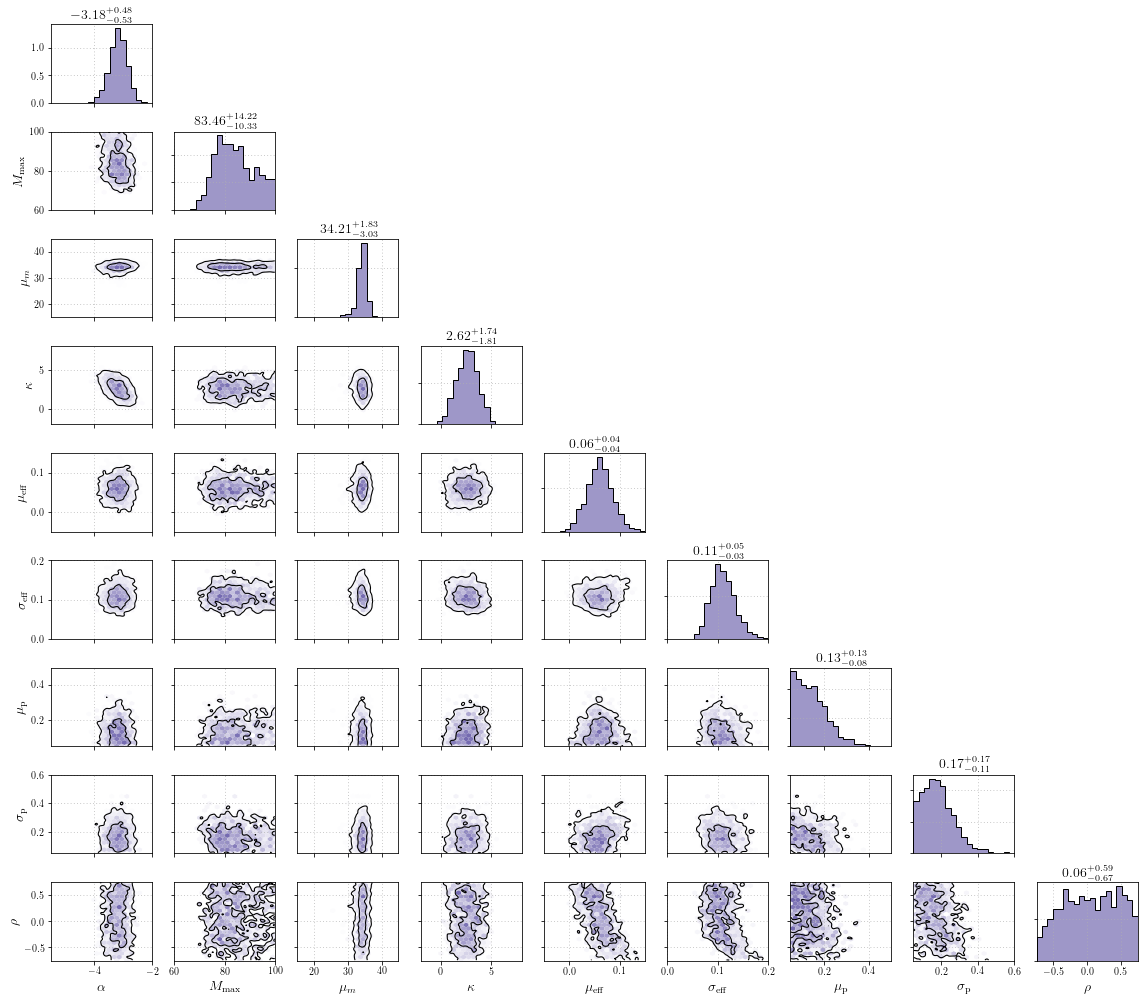

In [8]:
to_plot = {
    'alpha':{'data':processed_samps[:,0],'plot_bounds':(-5.5,-2),'label':r"$\alpha$"},
    'mMax':{'data':processed_samps[:,1],'plot_bounds':(60,100),'label':r"$M_\mathrm{max}$"},
    'm0':{'data':processed_samps[:,2],'plot_bounds':(15,45),'label':r"$\mu_m$"},
    'kappa':{'data':processed_samps[:,6],'plot_bounds':(-2,8),'label':r"$\kappa$"},
    'muEff':{'data':processed_samps[:,-5],'plot_bounds':(-0.05,0.15),'label':r"$\mu_\mathrm{eff}$"},
    'sigEff':{'data':processed_samps[:,-4],'plot_bounds':(0,0.2),'label':r"$\sigma_\mathrm{eff}$"},
    'muP':{'data':processed_samps[:,-3],'plot_bounds':(0.05,0.5),'label':r"$\mu_\mathrm{p}$"},
    'sigP':{'data':processed_samps[:,-2],'plot_bounds':(0.05,0.6),'label':r"$\sigma_\mathrm{p}$"},
    'rho':{'data':processed_samps[:,-1],'plot_bounds':(-0.75,0.75),'label':r"$\rho$"}
    }

fig = plt.figure(figsize=(16,14))
plot_corner(fig,to_plot,"#756bb1")
plt.tight_layout()
fig.savefig('corner.pdf',bbox_inches='tight')
plt.show()

The disagreement in some of these parameters is due to the fact that I *fix* mMin=5, whereas the gwpop results assume a variable mMin with tapering. See the following (blue shows my bounds, dark traces are from gwpop) --

In [9]:
def Calculate_Gaussian(x, mu, sigma2, low, high):
    norm = np.sqrt(sigma2*np.pi/2)*(-erf((low-mu)/np.sqrt(2*sigma2)) + erf((high-mu)/np.sqrt(2*sigma2)))
    y = (1.0/norm)*np.exp((-1.0*(x-mu)**2)/(2.*sigma2))
    y[np.where(x<low)] = 0.
    return y

def plPeakDistribution(m1,lmbda,mu_peak,sig_peak,mMin,mMax,frac_peak):
    p_m1_pl = (1.+lmbda)*m1**lmbda/(mMax**(1.+lmbda) - mMin**(1.+lmbda))
    p_m1_peak = Calculate_Gaussian(m1,mu_peak,sig_peak**2,mMin,mMax)
    p_m1_pl[m1<mMin] = 0
    p_m1_pl[m1>mMax] = 0
    return frac_peak*p_m1_peak + (1.-frac_peak)*p_m1_pl

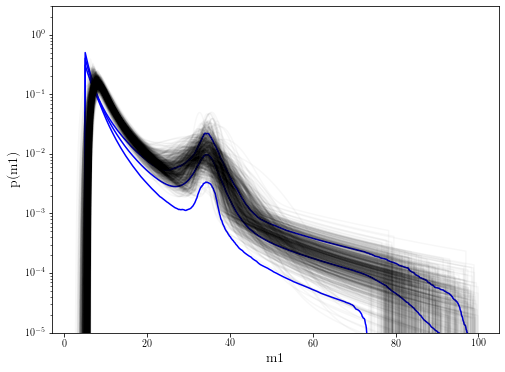

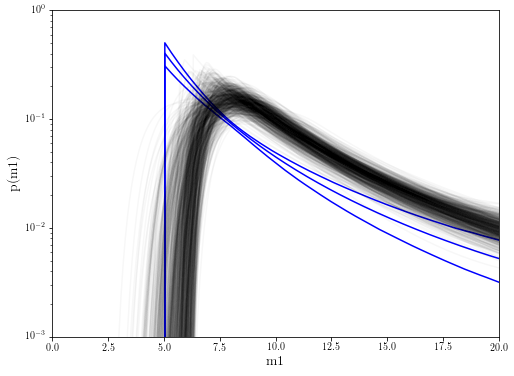

In [10]:
gwpopFile = "/home/thomas.callister/CBC/o3b-population-data/analyses/PowerLawPeak/o1o2o3_mass_c_iid_mag_iid_tilt_powerlaw_redshift_mass_data.h5"
f = h5py.File(gwpopFile,'r')

fig,ax = plt.subplots(figsize=(8,6))

m1_grid = np.linspace(2,100,1000)
for i in range(750):
    y = f['lines']['mass_1'][i,:]
    y /= np.trapz(y,m1_grid)
    ax.plot(np.linspace(2,100,1000),y,color='black',alpha=0.03)


p_m1 = np.zeros((processed_samps[:,0].size,1000))
for i in range(processed_samps[:,0].size):
    p_m1[i,:] = plPeakDistribution(
            m1_grid,
            processed_samps[i,0],
            processed_samps[i,2],
            processed_samps[i,3],
            5.,
            processed_samps[i,1],
            processed_samps[i,4]
            )
    
ax.plot(m1_grid,np.mean(p_m1,axis=0),color='blue',zorder=-1)
ax.plot(m1_grid,np.quantile(p_m1,0.05,axis=0),color='blue',zorder=-1)
ax.plot(m1_grid,np.quantile(p_m1,0.95,axis=0),color='blue',zorder=-1)

ax.set_yscale('log')
ax.set_ylim(1e-5,3)
ax.set_xlabel('m1',fontsize=14)
ax.set_ylabel('p(m1)',fontsize=14)

plt.show()

fig,ax = plt.subplots(figsize=(8,6))
m1_grid = np.linspace(2,100,1000)
for i in range(750):
    y = f['lines']['mass_1'][i,:]
    y /= np.trapz(y,m1_grid)
    ax.plot(np.linspace(2,100,1000),y,color='black',alpha=0.03)
    
ax.plot(m1_grid,np.mean(p_m1,axis=0),color='blue',zorder=-1)
ax.plot(m1_grid,np.quantile(p_m1,0.05,axis=0),color='blue',zorder=-1)
ax.plot(m1_grid,np.quantile(p_m1,0.95,axis=0),color='blue',zorder=-1)

ax.set_yscale('log')
ax.set_ylim(1e-3,1)
ax.set_xlim(0,20)
ax.set_xlabel('m1',fontsize=14)
ax.set_ylabel('p(m1)',fontsize=14)
plt.show()

Here are results from a trial run in which I *vary* mMin as another free parameter (still with no smooth truncation). The mass distribution is in even better agreement now --

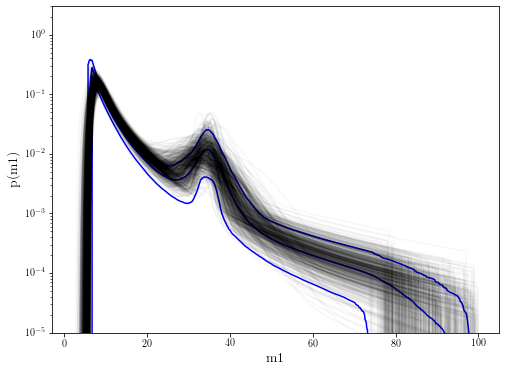

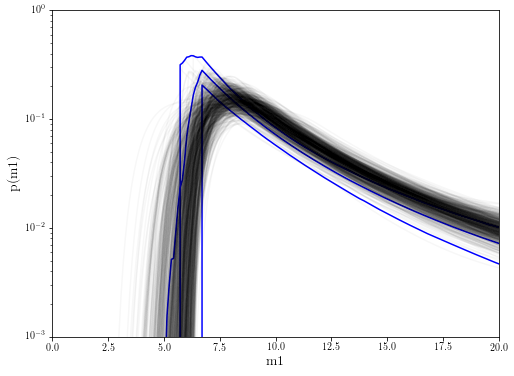

In [13]:
alt_processed_samps = np.load('../results/results_10-19/processed_gaussian_spin_samples_FAR_1_in_1_mMin_directMixtureTest_r00.npy','r')

fig,ax = plt.subplots(figsize=(8,6))

m1_grid = np.linspace(2,100,1000)
for i in range(750):
    y = f['lines']['mass_1'][i,:]
    y /= np.trapz(y,m1_grid)
    ax.plot(np.linspace(2,100,1000),y,color='black',alpha=0.03)

p_m1 = np.zeros((processed_samps[:,0].size,1000))
for i in range(processed_samps[:,0].size):
    p_m1[i,:] = plPeakDistribution(
            m1_grid,
            processed_samps[i,0],
            processed_samps[i,2],
            processed_samps[i,3],
            5.,
            processed_samps[i,1],
            processed_samps[i,4]
            )

p_m1 = np.zeros((alt_processed_samps[:,0].size,1000))
for i in range(alt_processed_samps[:,0].size):
    p_m1[i,:] = plPeakDistribution(
            m1_grid,
            alt_processed_samps[i,0],
            alt_processed_samps[i,3],
            alt_processed_samps[i,4],
            alt_processed_samps[i,1],
            alt_processed_samps[i,2],
            alt_processed_samps[i,5]
            )

    
ax.plot(m1_grid,np.mean(p_m1,axis=0),color='blue',zorder=-1)
ax.plot(m1_grid,np.quantile(p_m1,0.05,axis=0),color='blue',zorder=-1)
ax.plot(m1_grid,np.quantile(p_m1,0.95,axis=0),color='blue',zorder=-1)

ax.set_yscale('log')
ax.set_ylim(1e-5,3)
ax.set_xlabel('m1',fontsize=14)
ax.set_ylabel('p(m1)',fontsize=14)
plt.show()

fig,ax = plt.subplots(figsize=(8,6))
m1_grid = np.linspace(2,100,1000)
for i in range(750):
    y = f['lines']['mass_1'][i,:]
    y /= np.trapz(y,m1_grid)
    ax.plot(np.linspace(2,100,1000),y,color='black',alpha=0.03)
    
ax.plot(m1_grid,np.mean(p_m1,axis=0),color='blue',zorder=-1)
ax.plot(m1_grid,np.quantile(p_m1,0.05,axis=0),color='blue',zorder=-1)
ax.plot(m1_grid,np.quantile(p_m1,0.95,axis=0),color='blue',zorder=-1)

ax.set_yscale('log')
ax.set_ylim(1e-3,1)
ax.set_xlim(0,20)
ax.set_xlabel('m1',fontsize=14)
ax.set_ylabel('p(m1)',fontsize=14)
plt.show()

The marginal `mu_p` and `sigma_p` distributions change a tiny bit -- there's still a "band" in the joint posterior space, but the bit of the band that extends to `sigma_p =0` is now slightly supressed. This shift doesn't impact any of our conclusions, though.

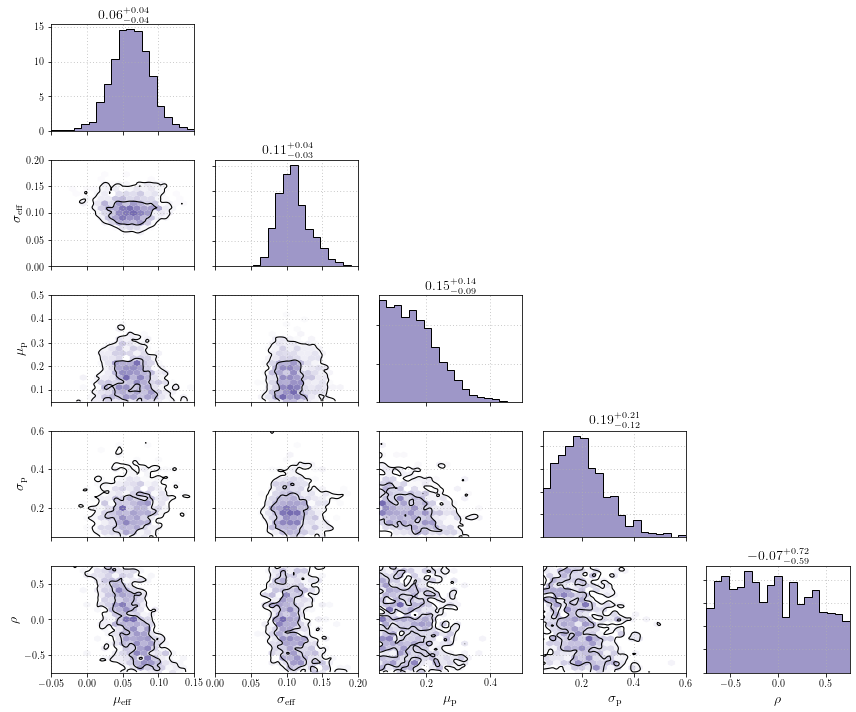

In [14]:
to_plot = {
    'muEff':{'data':alt_processed_samps[:,-5],'plot_bounds':(-0.05,0.15),'label':r"$\mu_\mathrm{eff}$"},
    'sigEff':{'data':alt_processed_samps[:,-4],'plot_bounds':(0,0.2),'label':r"$\sigma_\mathrm{eff}$"},
    'muP':{'data':alt_processed_samps[:,-3],'plot_bounds':(0.05,0.5),'label':r"$\mu_\mathrm{p}$"},
    'sigP':{'data':alt_processed_samps[:,-2],'plot_bounds':(0.05,0.6),'label':r"$\sigma_\mathrm{p}$"},
    'rho':{'data':alt_processed_samps[:,-1],'plot_bounds':(-0.75,0.75),'label':r"$\rho$"}
    }

fig = plt.figure(figsize=(12,10))
plot_corner(fig,to_plot,"#756bb1")
plt.show()

# 5. Truncation Tests

## Gaussian in with variable cut-off

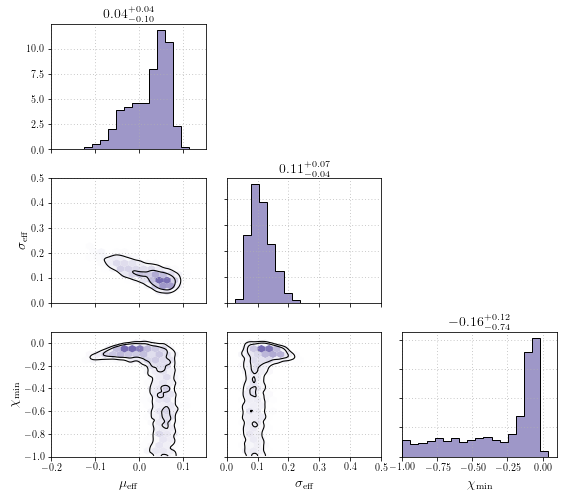

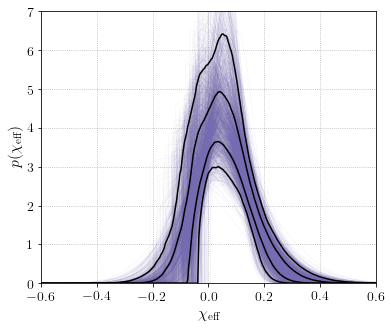

In [11]:
processed_samps = np.load('./../results/results_11-29/processed_truncatedGaussian_chiEffOnly_spin_samples_FAR_1_in_1_r03r04.npy','r')
to_plot = {
    'muEff':{'data':processed_samps[:,-3],'plot_bounds':(-0.2,0.15),'label':r"$\mu_\mathrm{eff}$"},
    'sigEff':{'data':processed_samps[:,-2],'plot_bounds':(0,0.5),'label':r"$\sigma_\mathrm{eff}$"},
    'chi_min':{'data':processed_samps[:,-1],'plot_bounds':(-1,0.1),'label':r"$\chi_\mathrm{min}$"}
    }

fig = plt.figure(figsize=(8,7))
plot_corner(fig,to_plot,"#756bb1")
plt.show()

# Set up traceplot
mu = processed_samps[:,-3]
sig = processed_samps[:,-2]
chiMin = processed_samps[:,-1]

fig,ax = plt.subplots(figsize=(6,5))
x_grid = np.linspace(-1,1,500)

ys = np.zeros((mu.size,x_grid.size))

for i in range(mu.size):

    y = calculate_Gaussian(x_grid,mu[i],sig[i]**2.,chiMin[i],1)
    ax.plot(x_grid,y,color='#756bb1',alpha=0.2,lw=0.2)
    ys[i,:] = y
    
ax.plot(x_grid,np.quantile(ys,0.05,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.25,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.75,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.95,axis=0),color='black')

ax.set_xlim(-0.6,0.6)
ax.set_ylim(0,7)
ax.axes.grid(True,which='major',ls=':')
ax.set_xlabel('$\chi_\mathrm{eff}$',fontsize=16)
ax.set_ylabel('$p(\chi_\mathrm{eff})$',fontsize=16)
ax.tick_params(labelsize=14)

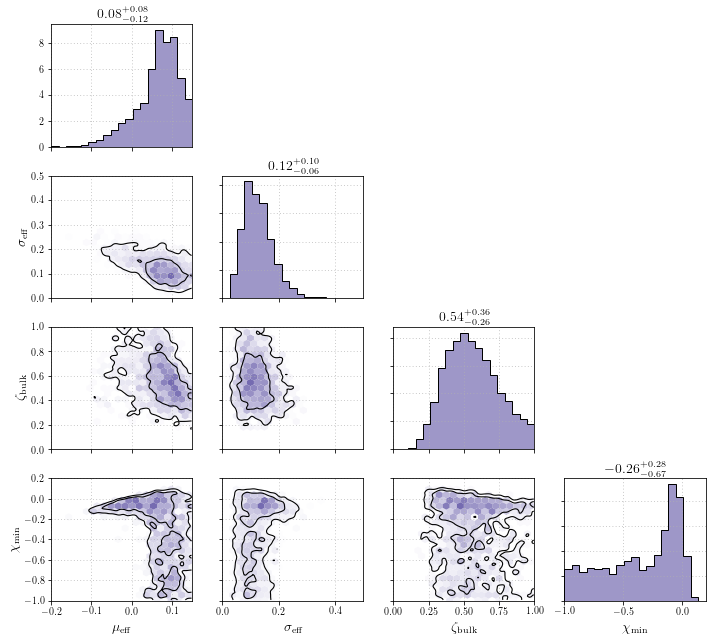

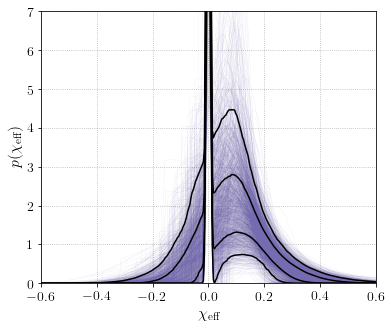

In [12]:
processed_samps = np.load('./../results/results_11-29/processed_truncatedMixtureModel_samples_FAR_1_in_1_bulkTruncated_r01.npy','r')
to_plot = {
    'muEff':{'data':processed_samps[:,-4],'plot_bounds':(-0.2,0.15),'label':r"$\mu_\mathrm{eff}$"},
    'sigEff':{'data':processed_samps[:,-3],'plot_bounds':(0,0.5),'label':r"$\sigma_\mathrm{eff}$"},
    'zetaBulk':{'data':processed_samps[:,-2],'plot_bounds':(0,1),'label':r"$\zeta_\mathrm{bulk}$"},
    'chi_min':{'data':processed_samps[:,-1],'plot_bounds':(-1,0.2),'label':r"$\chi_\mathrm{min}$"}
    }

fig = plt.figure(figsize=(10,9))
plot_corner(fig,to_plot,"#756bb1")
plt.tight_layout()
plt.show()

# Set up traceplot
mu = processed_samps[:,-4]
sig = processed_samps[:,-3]
zeta_bulk = processed_samps[:,-2]
chiMin = processed_samps[:,-1]

fig,ax = plt.subplots(figsize=(6,5))
x_grid = np.linspace(-1,1,500)

ys = np.zeros((mu.size,x_grid.size))

for i in range(mu.size):

    y = zeta_bulk[i]*calculate_Gaussian(x_grid,mu[i],sig[i]**2.,chiMin[i],1) \
            + (1.-zeta_bulk[i])*calculate_Gaussian(x_grid,0,0.005**2.,-1,1)
    ax.plot(x_grid,y,color='#756bb1',alpha=0.2,lw=0.2)
    ys[i,:] = y
    
ax.plot(x_grid,np.quantile(ys,0.05,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.25,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.75,axis=0),color='black')
ax.plot(x_grid,np.quantile(ys,0.95,axis=0),color='black')

ax.set_xlim(-0.6,0.6)
ax.set_ylim(0,7)
ax.axes.grid(True,which='major',ls=':')
ax.set_xlabel('$\chi_\mathrm{eff}$',fontsize=16)
ax.set_ylabel('$p(\chi_\mathrm{eff})$',fontsize=16)
ax.tick_params(labelsize=14)